## Dimensionality reduction, Principal Component Analysis

### A more intuitive example

In [1]:
import pandas as pd
import numpy as np
from PIL import Image, ImageFilter, ImageOps
import matplotlib.pyplot as plt

## Hardcoded input args
imgList='./Data/ListImages.csv'
inDir='./Data/faces94'


In [2]:
## Read list of images
df = pd.read_csv(imgList)
df.shape

(3059, 4)

In [3]:
## Read images as numpy array
tmpRGB = np.asarray(Image.open(inDir + '/' + df.IMGPATH[0]))
imgSize = np.array(tmpRGB.shape)
imgSize = imgSize[[2,0,1]]                  

#dMat = np.zeros([df.shape[0], imgSize[0], np.prod(imgSize[1:])]).astype(np.uint8)
dMat = np.zeros([50, imgSize[0], np.prod(imgSize[1:])]).astype(np.uint8)

## Read images to data matrix
print('Reading images ...')
for i, tmpRow in df.head(50).iterrows():
    tmpRGB = np.asarray(Image.open(inDir + '/' + tmpRow.IMGPATH))
    tmpRGB = np.moveaxis(tmpRGB,2,0)
    tmpRGB = tmpRGB.reshape([tmpRGB.shape[0], tmpRGB.shape[1]*tmpRGB.shape[2]])
    
    dMat[i,:, :] = tmpRGB
    

Reading images ...


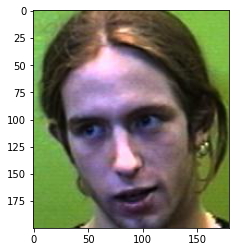

In [4]:
## Check few images
imTmp = dMat[37,:,:].reshape(imgSize)
imTmp = np.moveaxis(imTmp,0,2)
plt.imshow(imTmp)
plt.show()


In [5]:
## Read images as numpy array (as grayscale)
tmpRGB = np.asarray(Image.open(inDir + '/' + df.IMGPATH[0]))
imgSize = np.array(tmpRGB.shape[0:2])

dMat = np.zeros([df.shape[0], np.prod(imgSize)]).astype(np.uint8)

## Read images to data matrix
print('Reading images ...')
for i, tmpRow in df.iterrows():
    tmpRGB = Image.open(inDir + '/' + tmpRow.IMGPATH)
    tmpGray = np.asarray(ImageOps.grayscale(tmpRGB)).astype(np.uint8).flatten()

    dMat[i,:] = tmpGray

Reading images ...


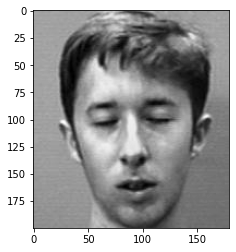

In [6]:
## Check few images
plt.imshow(dMat[217,:].reshape(imgSize).squeeze(), cmap='gray')
plt.show()

In [7]:
## Apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

NUM_COMP = 40

scaler = StandardScaler()
scaler.fit(dMat)
X = scaler.transform(dMat)

pca = PCA(n_components = NUM_COMP)
pcaMdl = pca.fit(X)
pcaCoor = pcaMdl.transform(X)
dfPCA = pd.DataFrame(data = pcaCoor, columns = ['PCA_' + s for s in np.arange(0, NUM_COMP).astype(str)])


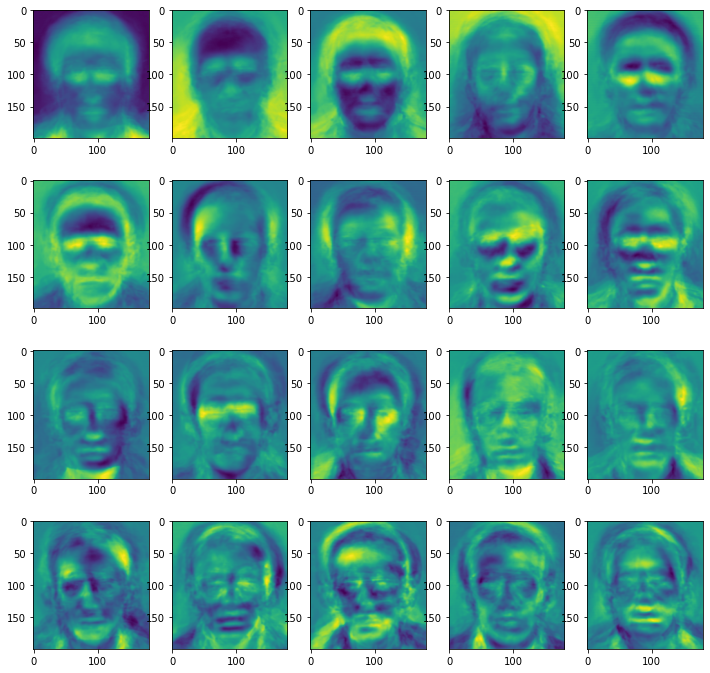

In [8]:
## Display eigenvectors (first n)
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    pImg = np.array(pcaMdl.components_[i,:]).reshape(imgSize)
    plt.imshow(pImg)
plt.show()


In [ ]:
## Display eigenvectors (last n)
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    pImg = np.array(pcaMdl.components_[-i-1,:]).reshape(imgSize)
    plt.imshow(pImg)
plt.show()

In [ ]:
print(pcaMdl.explained_variance_ratio_)
print(np.sum(pcaMdl.explained_variance_ratio_))

In [ ]:
plt.plot(pcaMdl.explained_variance_ratio_, 'o-')

In [ ]:
plt.plot(np.cumsum(pcaMdl.explained_variance_ratio_), 'o-')

### Reconstruction error using PCA

In [ ]:
IMG_NO = 77

f1 = dMat[IMG_NO,:].reshape(imgSize)
plt.imshow(f1, cmap='gray')

In [ ]:
plt.plot(pcaCoor[IMG_NO,0:NUM_COMP])

#### A different subject

In [ ]:
plt.plot(pcaCoor[0,0:NUM_COMP])

In [ ]:
NUM_COMP = 1
imgRecon = np.dot(pcaCoor[IMG_NO, 0:NUM_COMP], pcaMdl.components_[0:NUM_COMP,:])
imgRecon = scaler.inverse_transform(imgRecon)
f1 = imgRecon.reshape(imgSize)
plt.imshow(f1, cmap='gray')

In [ ]:
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    imgRecon = np.dot(pcaCoor[IMG_NO,0:i], pcaMdl.components_[0:i,:])
    imgRecon = scaler.inverse_transform(imgRecon)
    f1 = imgRecon.reshape(imgSize)
    plt.imshow(f1, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()


### Difference image

In [ ]:
imgActual = dMat[IMG_NO,:]

plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4,5,i+1)
    imgRecon = np.dot(pcaCoor[IMG_NO,0:i], pcaMdl.components_[0:i,:])
    imgRecon = scaler.inverse_transform(imgRecon)
    imgDiff = np.abs(imgActual - imgRecon)
    f1 = imgDiff.reshape(imgSize)
    plt.imshow(f1, cmap='gray')
plt.show()


In [ ]:
from numpy import linalg as LA

imgActual = dMat[IMG_NO, :]

for i in range(20):
    imgRecon = np.dot(pcaCoor[IMG_NO, 0:i], pcaMdl.components_[0:i,:])
    imgRecon = scaler.inverse_transform(imgRecon)
    imgDiff = np.abs(imgActual - imgRecon)
    print('Num PCA comp: ' + str(i) + ', reconstruction error: ' + str(LA.norm(imgDiff.flatten())))
        
